Outliers:
Index: 341, x: 188.0, y: 178.3
Index: 1673, x: 130.0, y: 190.0
Index: 2271, x: 133.1, y: 178.0
Index: 2484, x: 100.0, y: 170.0
Index: 3943, x: 180.0, y: 140.5


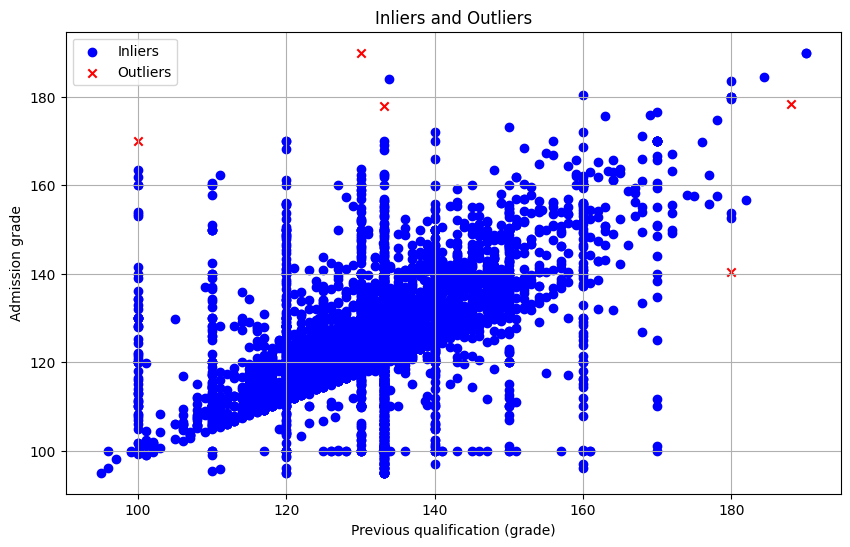

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import platform

if platform.system() == 'Windows':
    build_path = os.path.join(os.getcwd(), "build", "Debug")
elif platform.system() == 'Darwin':  # macOS
    build_path = os.path.join(os.getcwd(), "build")
else:
    raise EnvironmentError("Unsupported operating system")

sys.path.append(build_path)
 
import ocsvm


df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')

# Extract the desired columns as (index, x, y) tuples
data = [(i, row['Previous qualification (grade)'], row['Admission grade']) for i, row in df.iterrows()]

# Initialize the OC-SVM model
model = ocsvm.OCSVM(nu=0.999, kernel="rbf", gamma=0.9)

# Train the model
model.fit([point[1:] for point in data])  # Only use the x and y values for training

# Classify points and separate inliers and outliers
inliers_data = []
outliers_data = []

for point, label in zip(data, [model.predict(point[1:]) for point in data]):
    if label == 1:  # Inlier
        inliers_data.append(point)
    else:  # Outlier
        outliers_data.append(point)

print("Outliers:")
for point in outliers_data:
    print(f"Index: {point[0]}, x: {point[1]}, y: {point[2]}")

# Remove the outliers from the original dataframe
outlier_indices = [point[0] for point in outliers_data]
cleaned_df = df.drop(index=outlier_indices)

# Optionally, you can save the cleaned dataset with outliers removed
cleaned_df.to_csv('Datasets/predict-dropout-or-academic-success-cleaned.csv', index=False)

# Plot inliers and outliers
inliers_x = [point[1] for point in inliers_data]
inliers_y = [point[2] for point in inliers_data]
outliers_x = [point[1] for point in outliers_data]
outliers_y = [point[2] for point in outliers_data]

plt.figure(figsize=(10, 6))
plt.scatter(inliers_x, inliers_y, c='blue', label='Inliers', marker='o')
plt.scatter(outliers_x, outliers_y, c='red', label='Outliers', marker='x')
plt.title('Inliers and Outliers')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.legend()
plt.grid(True)
plt.show()
